<a href="https://colab.research.google.com/github/msrana172/Machine-Learning-ML-/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering with Python and Machine Learning

In [0]:
# Import Required LibLibraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
# Load Data from our System to Google Colab
from google.colab import files
files.upload()

Saving income_data.csv to income_data.csv


{'income_data.csv': b'Name,Age,Income($)\r\nRob,27,70000\r\nMichael,29,90000\r\nMohan,29,61000\r\nIsmail,28,60000\r\nKory,42,150000\r\nGautam,39,155000\r\nDavid,41,160000\r\nAndrea,38,162000\r\nBrad,36,156000\r\nAngelina,35,130000\r\nDonald,37,137000\r\nTom,26,45000\r\nArnold,27,48000\r\nJared,28,51000\r\nStark,29,49500\r\nRanbir,32,53000\r\nDipika,40,65000\r\nPriyanka,41,63000\r\nNick,43,64000\r\nAlia,39,80000\r\nSid,41,82000\r\nRamesh,39,58000'}

In [11]:
df = pd.read_csv('income_data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

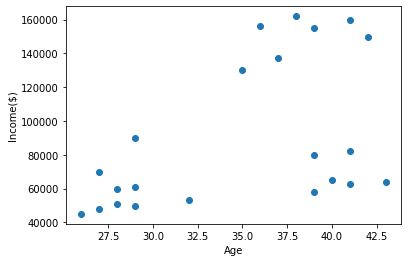

In [12]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')


In [13]:
k_means = KMeans(n_clusters = 3)
y_pred =  k_means.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [14]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [15]:
k_means.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

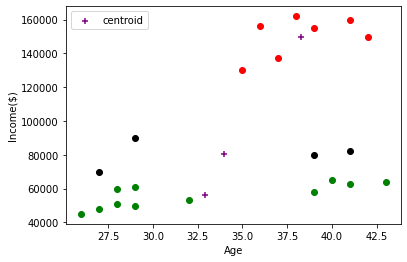

In [19]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color = 'purple', marker = '+', label = 'centroid')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()
plt.show()

Preprocessing using Min-Max-Scaler Method

In [0]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income($)"] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [24]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


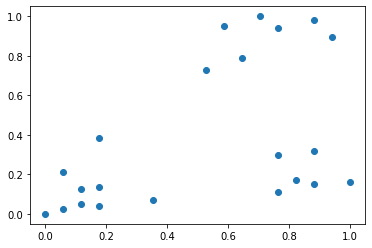

In [25]:
plt.scatter(df['Age'], df['Income($)'])

In [26]:
k_means = KMeans(n_clusters = 3)
y_pred = k_means.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [27]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [28]:
k_means.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

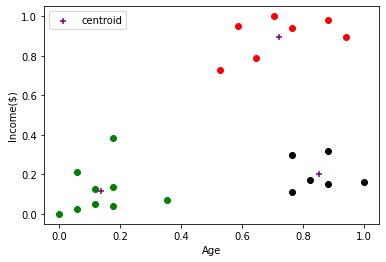

In [29]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color = 'purple', marker = '+', label = 'centroid')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()
plt.show()

Elbow Plotting 

In [31]:
SEE = []
k_rng = range(1, 10)
for k in k_rng:
    k_means = KMeans(n_clusters = k)
    k_means.fit(df[['Age', 'Income($)']])
    SEE.append(k_means.inertia_)
print(SEE)    

[5.43401151198818, 2.091136388699078, 0.4750783498553096, 0.3491047094419565, 0.2664030124668416, 0.22037641690770668, 0.17681044133887713, 0.13265419827245162, 0.10188787724979426]


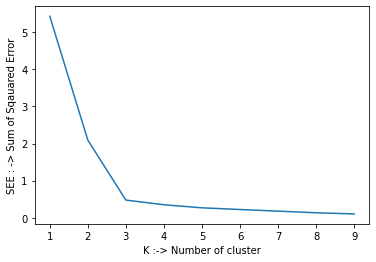

In [32]:
plt.xlabel('K :-> Number of cluster')
plt.ylabel('SEE : -> Sum of Sqauared Error')
plt.plot(k_rng, SEE)